In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Create the dataset
n, d = 1000, 2
y_tr = 2 * np.random.binomial(1, 0.5, n) - 1
x_tr = np.zeros((n, d))
x1_tr = np.random.randn((y_tr == -1).sum(), d) + np.array([100, 0])
x2_tr = np.random.randn((y_tr == 1).sum(), d) + np.array([103, 0])
x_tr[y_tr == -1, :2] = x1_tr
x_tr[y_tr == 1, :2] = x2_tr

y_te = 2 * np.random.binomial(1, 0.5, n) - 1
x_te = np.zeros((n, d))
x1_te = np.random.randn((y_te == -1).sum(), d) + np.array([100, 0])
x2_te = np.random.randn((y_te == 1).sum(), d) + np.array([103, 0])
x_te[y_te == -1, :2] = x1_te
x_te[y_te == 1, :2] = x2_te

# Adding a dummy dimension for dealing with the shifts.
ones_tr = np.ones((x_tr.shape[0], 1))
ones_te = np.ones((x_te.shape[0], 1))

x_tr_d = np.concatenate([x_tr, ones_tr], axis=1)
x_te_d = np.concatenate([x_te, ones_te], axis=1)

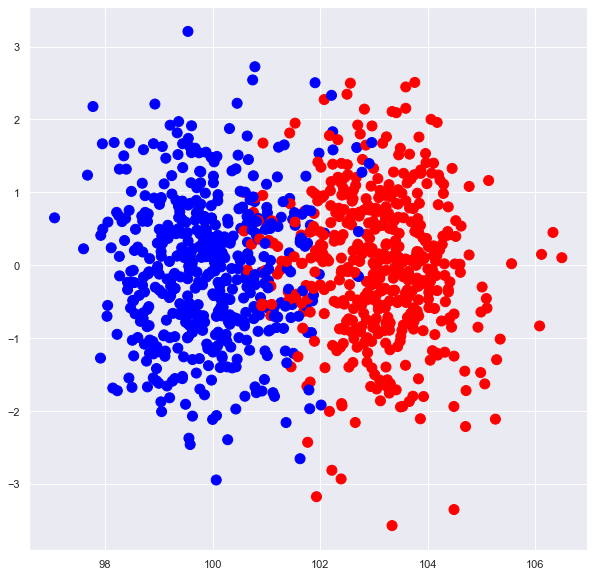

In [3]:
# Plot the dataset
plt.figure(figsize=(10, 10))
plt.scatter(x_tr_d[:, 0], x_tr_d[:, 1], c=y_tr, s=100, cmap='bwr')
plt.show()

In [4]:
# Function check overfitting or underfitting with leanring curve
def plot_learning_curve(train_sizes, train_scores, test_scores, title):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    plt.plot(train_sizes, train_scores, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# Function to plot the decision boundary
def plot_decision_boundary(X, y, model):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 10))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='bwr')
    plt.show()

# Function to plot the decision boundary with dummy dimension
def plot_decision_boundary_d(X, y, model):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel(), np.ones((xx.ravel().shape[0], 1))])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 10))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='bwr')
    plt.show()

In [5]:
# Fit model with Ridge Regression Classifier, optimize the alpha parameter
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid = GridSearchCV(RidgeClassifier(), param_grid, cv=5)
grid.fit(x_tr_d, y_tr)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
best_params = grid.best_params_
print("Test set score: {:.2f}".format(grid.score(x_te_d, y_te)))

# Fit model with the best alpha parameter
ridge = RidgeClassifier(alpha=0.001).fit(x_tr_d, y_tr)
print("Training set score: {:.2f}".format(ridge.score(x_tr_d, y_tr)))
print("Test set score: {:.2f}".format(ridge.score(x_te_d, y_te)))

Best cross-validation score: 0.93
Best parameters:  {'alpha': 0.001}
Test set score: 0.94
Training set score: 0.93
Test set score: 0.94


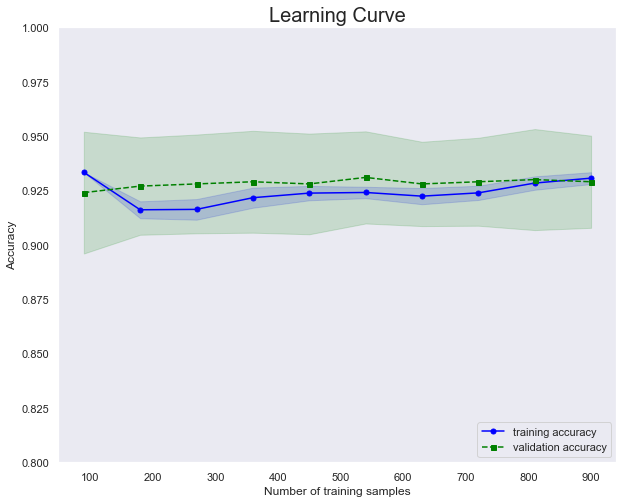

In [13]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=ridge, X=x_tr, y=y_tr, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,8))
plt.title('Learning Curve', fontsize=20)
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()